# Programming exercise 2: Split-step Fourier method

Due on Monday, 05.11.2018, 14.15h

### Total: 100 points

__This exercise sheet has been solved by:__ Mathieu Kaltschmidt and Carl von Randow

## Defining the problem

We want to calculate the time evolution of a quantum particle in a on-dimensional potential, i.e. solve the initial value problem

$$ i\partial_t \psi(x,t) = \left[-\frac{1}{2} \partial_{x}^2 + V(x)\right] \psi(x,t) $$

with initial condition

$$ \psi(x,t=0) = \psi_0(x) $$

by representing the wave function $\psi(x,t)$ on a discrete spatial grid and propagating it using the split-step Fourier method.

In [1]:
#loading standard libraries
import numpy as np   
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

#useful functions
from numpy.fft import fft, ifft, fftshift

#Plot settings
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 24
plt.rcParams["figure.figsize"][1] = 6

### Exercise 1 (50 points)

Write a function that calculates the discrete Fourier transform of a wave function. Use only even numbers of grid points. You have learned that the split-step-Fourier method automatically imposes periodic bounbdary conditions, so it makes sense to define the spatial grid like -L/2,-L/2+dx ... L/2-dx.

Test your code by Fourier transforming functions where you know what the outcome should be, e.g. a constant function, a cos-function etc.
Implement also the inverse Fourier transform. Make sure you get back the original function after applying the FT twice.

Numpy provides a fast Fourier transform module. Campare your manual FT the result of the fast Fourier algorithm. Pay special attention the ordering in which the Fourier components are retured by the FFT.

In [2]:
#Defining the spatial grid structure 
L = 20
N = 400
dx = L/N
grid = np.linspace(-L/2,L/2-dx,N)

#Grid in momentum-space
dk_x = (2*np.pi)/(len(grid)*dx)
k_x = dk_x*np.arange(-N/2,N/2) 

In [3]:
#Implementation of the discrete Fourier transformation, including the inverse transformation
def my_discrete_FT(func, inverse = False):
    """
    We want to work with grid structures with an even amount of gridpoints.
    """
    if len(func) % 2 == 1:
        raise ValueError('Please use a grid structure with an even amount of gridpoints.')
    """
    To directly implement the inverse transformation we allow the sign of the exponent to change
    if the inverse option is chosen by the one who uses this function.
    """
    if inverse == True:
        signum = 1
    else:
        signum = -1
        
    FT = []
    for k in range(N):  
        tmp = complex(0) #Initialize our array with a complex null vector
        for x in range(N):
            tmp += 1/np.sqrt(N) * func[x] * np.exp(signum*complex(0,2) * np.pi * x * k / N)
        FT.append(tmp)
    return FT

In [44]:
#some known test-functions
def const(x, val=1):
    return val * np.ones(len(x))

def cos(x, omega):
    return np.cos(omega*x)

def gaussian(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

def box_intern(x,a=0):
    if(np.abs(x) < 1):
        return 1
    else:
        return 0
def box(x,a=0):
    return np.array([box_intern(i) for i in x])

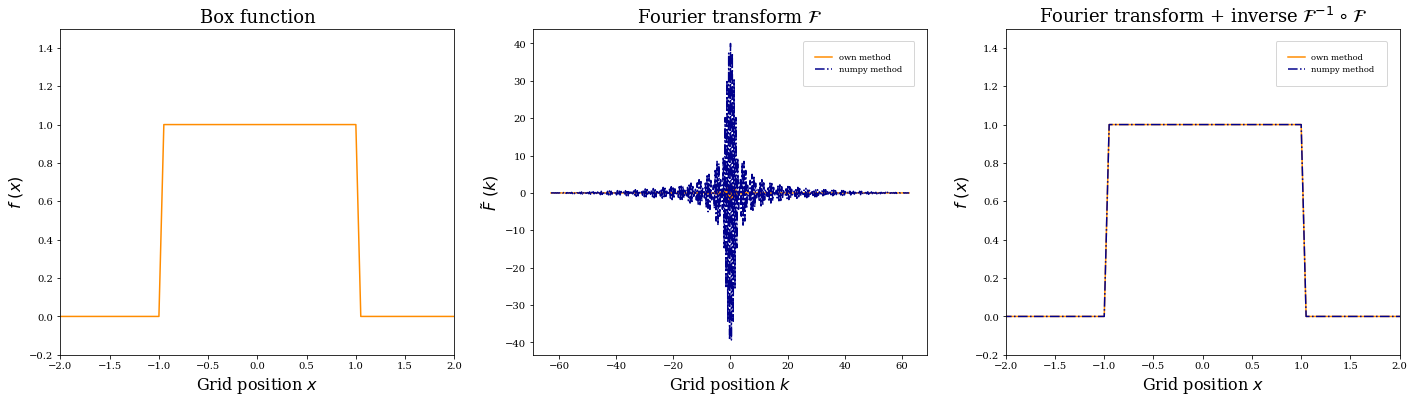

In [84]:
#test with the box-function
plt.subplot(131)
plt.plot(grid,box(grid,1),color='darkorange')
plt.title('Box function', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.ylim(-0.2,1.5)
plt.xlim(-2,2)


plt.subplot(132)
plt.plot(k_x,np.real(fftshift(my_discrete_FT(box(grid,1)))),color='darkorange', label = 'own method')
plt.plot(k_x,np.real(fftshift(fft(box(grid,1)))), color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform $\mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $k$', size = 16)
plt.ylabel(r'$\tilde{F} \ (k)$', size = 16)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')


plt.subplot(133)
plt.plot(grid,np.real((my_discrete_FT(my_discrete_FT(box(grid,1)),inverse=True))),color='darkorange',label = 'own method')
plt.plot(grid,np.real((ifft(fft(box(grid,1))))),color='darkblue',ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform + inverse $\mathcal{F}^{-1} \circ \mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.ylim(-0.2,1.5)
plt.xlim(-2,2)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')


#Saving the result
plt.savefig('Plots/box.pdf', format='PDF')

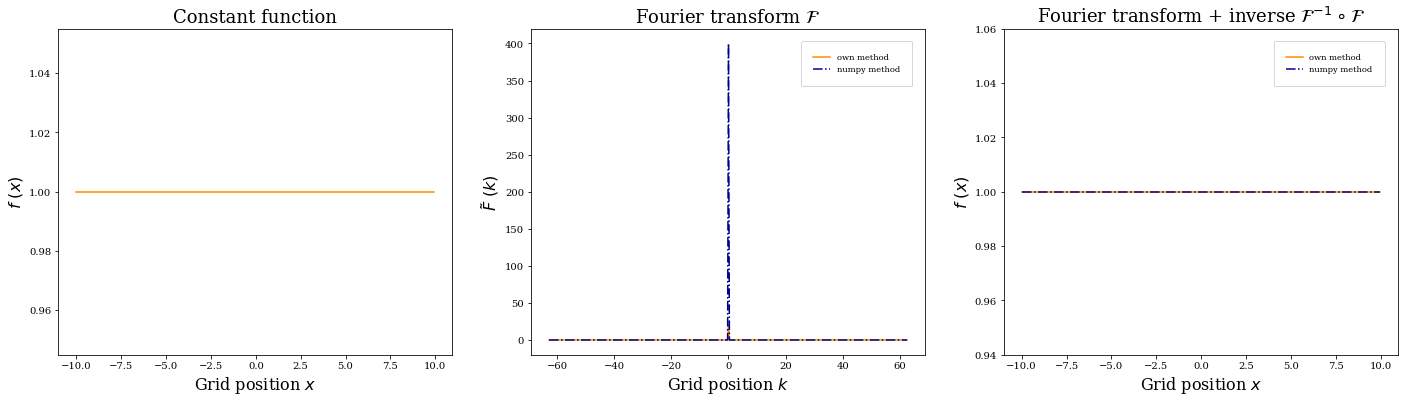

In [83]:
#test with const-function
plt.subplot(131)
plt.plot(grid,const(grid,1),color='darkorange')
plt.title('Constant function', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)

plt.subplot(132)
plt.plot(k_x,np.real(fftshift(my_discrete_FT(const(grid,1)))),color='darkorange', label = 'own method')
plt.plot(k_x,np.real(fftshift(fft(const(grid,1)))),color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform $\mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $k$', size = 16)
plt.ylabel(r'$\tilde{F} \ (k)$', size = 16)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')

plt.subplot(133)
plt.plot(grid,np.real(my_discrete_FT(my_discrete_FT(const(grid,1),inverse=True))),color='darkorange', label = 'own method')
plt.plot(grid,np.real(ifft(fft(const(grid,1)))),color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform + inverse $\mathcal{F}^{-1} \circ \mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.ylim(0.94,1.06)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the result
plt.savefig('Plots/const.pdf', format='PDF')

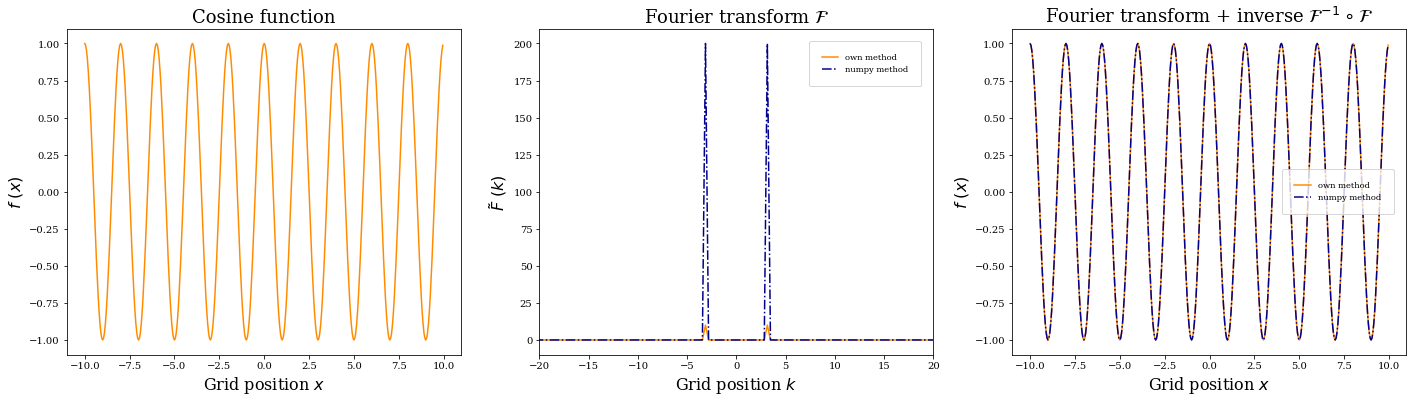

In [82]:
#test with cos-function
plt.subplot(131)
plt.plot(grid,cos(grid,np.pi),color='darkorange')
plt.title('Cosine function', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.ylim(-1.1,1.1)

plt.subplot(132)
plt.plot(k_x,np.real(fftshift(my_discrete_FT(cos(grid,np.pi)))),color='darkorange', label = 'own method')
plt.plot(k_x,np.real(fftshift(fft(cos(grid,np.pi)))),color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform $\mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $k$', size = 16)
plt.ylabel(r'$\tilde{F} \ (k)$', size = 16)
plt.xlim(-20,20)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')

plt.subplot(133)
plt.plot(grid,np.real(my_discrete_FT(my_discrete_FT(cos(grid,np.pi)),inverse=True)),color='darkorange', label = 'own method')
plt.plot(grid,np.real(ifft(fft(cos(grid,np.pi)))),color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform + inverse $\mathcal{F}^{-1} \circ \mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.ylim(-1.1,1.1)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')


#Saving the result
plt.savefig('Plots/cos.pdf', format='PDF')

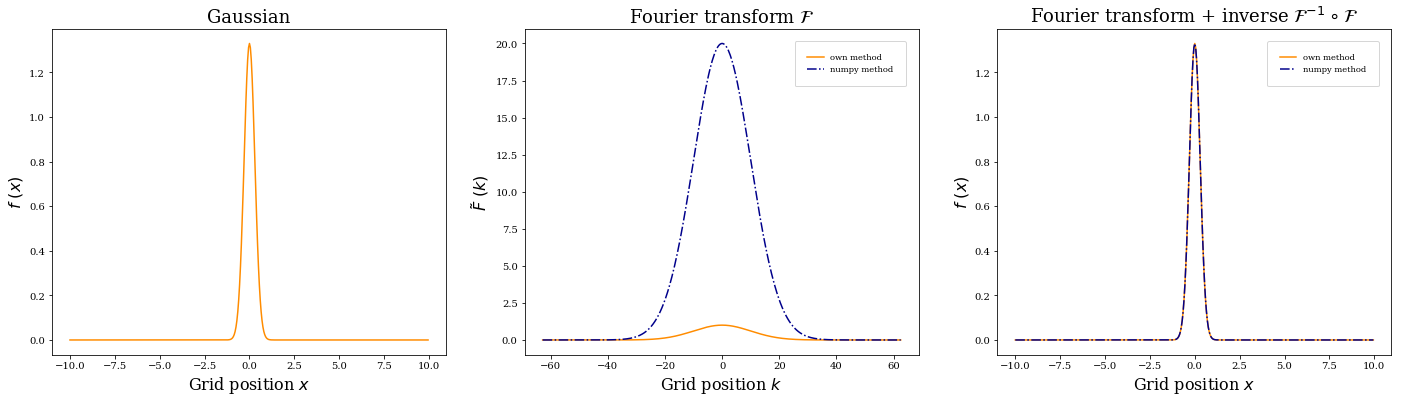

In [81]:
#test with gaussian
plt.subplot(131)
plt.plot(grid,gaussian(grid,0,0.3),color='darkorange')
plt.title('Gaussian', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)

plt.subplot(132)
plt.plot(k_x,np.abs(fftshift(my_discrete_FT(gaussian(grid,0,0.1)))),color='darkorange', label = 'own method')
plt.plot(k_x,np.abs(fftshift(fft(gaussian(grid,0,0.1)))),color='darkblue', ls = '-.', label = 'numpy method')
plt.title(r'Fourier transform $\mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $k$', size = 16)
plt.ylabel(r'$\tilde{F} \ (k)$', size = 16)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')

plt.subplot(133)
plt.plot(grid,np.real(my_discrete_FT(my_discrete_FT(gaussian(grid,0,0.3)),inverse=True)),color='darkorange', label = 'own method')
plt.plot(grid,np.real(ifft(fft(gaussian(grid,0,0.3)))),color='darkblue', ls = '-.' ,label = 'numpy method')
plt.title(r'Fourier transform + inverse $\mathcal{F}^{-1} \circ \mathcal{F}$', size = 18)
plt.xlabel(r'Grid position $x$', size = 16)
plt.ylabel(r'$f \ (x)$', size = 16)
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')


#Saving the result
plt.savefig('Plots/gaussian.pdf', format='PDF')

### Testing Numpy's FFT method

We already included the results of the Fourier transformation with our own method compared to the result of the np.fft methods in the plots above. <br>
As one can easily see, in general both methods generate the same output function but somehow the numpy method seems to have problems with the normalization sometimes. (compare the gaussian..) <br>
In addition we found out, that we have to use the "shifting" option to correct the allocation between the different Fourier modes and the corresponding representation on the grid structure.

### Exercise 2 (50 points)

Implement the split step Fourier algorithm using the numpy FFT and iFFT functions.

Test your code by propagating a Gaussian wave packet in free space. 

Calculate mean and variance at each time and plot them. Does you observation match your expectation?

Animate the time evolution of the wave packet as we did in exercise 5 of programming exercise 1.

Here are some example parameter that you could use:

In [90]:
# define the grid
L2 = 40
N2 = 512
dx2 = L2/N2
grid2 = np.linspace(-L2/2,L2/2-dx2,N2)

#parameters of the wave packet
x0 = -10;
sigma = 2;
p0 = 1;

#time steps
dt = 0.1;
tsteps = 150;

In [91]:
#some constants
hbar = 1 
m = 1
k0 = p0
k_x2=2*np.pi*fftshift(np.fft.fftfreq(N2,d=dx2))
dk_x2=np.diff(k_x2).mean()

#free space
def V(x):
    return 0

In [93]:
#Implementing the Split-Step-Fourier-method 
def my_split_step_FT(psi0,V,grid,k_x2):
    #Calculating mean and variance at each time step
    (mean_x, mean_x_squared, variance_x) = (np.zeros(2*tsteps+2), np.zeros(2*tsteps+2), np.zeros(2*tsteps+2))
    (mean_k, mean_k_squared, variance_k)  = (np.zeros(2*tsteps+1), np.zeros(2*tsteps+1), np.zeros(2*tsteps+1))

    ssft_x = np.zeros((2*tsteps + 2, N2), dtype=np.complex128)
    ssft_k = np.zeros((2*tsteps + 1, N2), dtype=np.complex128)
    (ssft_x[0], ssft_x[1]) = (psi0, np.exp(-complex(0,1)*hbar*dt*V(grid)/2)*psi0)
    (ssft_k[0], ssft_k[1]) = (fftshift(fft(psi0)), fftshift(fft(ssft_x[1])))
    
    for t in np.arange(1,tsteps):
        ssft_k[2*t] = np.exp(-complex(0,1)*hbar*dt*(k_x2**2)/(2*m))*ssft_k[2*t-1]
        ssft_x[2*t] = ifft(fftshift(ssft_k[2*t]))
        ssft_x[2*t+1] = np.exp(-complex(0,1)*hbar*dt*V(grid))*ssft_x[2*t]
        ssft_k[2*t+1] = fftshift(fft(ssft_x[2*t+1]))
     
    #last step in momentum space and last half step in spatial coordinates
    ssft_k[2*tsteps] = np.exp(-complex(0,1)*hbar*dt*(k_x2**2)/(2*m))*ssft_k[2*tsteps-1]
    ssft_x[2*tsteps] = ifft(fftshift(ssft_k[2*tsteps]))
    ssft_x[2*tsteps+1] = np.exp(-complex(0,1)*hbar*dt*V(grid)/2)*ssft_x[2*tsteps]
    
    for i in range(2*tsteps+2):
        mean_x[i] = np.real(np.sum(np.conj(ssft_x[i]) * grid2 * ssft_x[i]))
        mean_x_squared[i] = np.real(np.sum(np.conj(ssft_x[i]) * grid2**2 * ssft_x[i]))
        variance_x[i] = mean_x_squared[i] - mean_x[i]**2
        if(i!=2*tsteps+1):
            mean_k[i] = np.real(np.sum(np.conj(ssft_k[i]) * k_x2 * ssft_k[i]))
            mean_k_squared[i] = np.real(np.sum(np.conj(ssft_k[i]) * k_x2**2 * ssft_k[i]))
            variance_k[i] = mean_k_squared[i] - mean_k[i]**2
    
    (ssft_x, ssft_k) = (np.real(ssft_x), np.real(ssft_k))
    
    return ssft_x, ssft_k, mean_x, variance_x, mean_k, variance_k

In [94]:
#Defining the Gaussian wave packet
def gaussian_wavepacket(x,mu,sigma,p0):
    return np.exp(-((x-mu)**2)/(4*sigma**2)+ complex(0,1)*x*p0)/(2*np.pi*sigma**2)**0.25

time = np.array([0, *dt*np.arange(0.5, tsteps, 1/2),tsteps*dt])

<IPython.core.display.Javascript object>


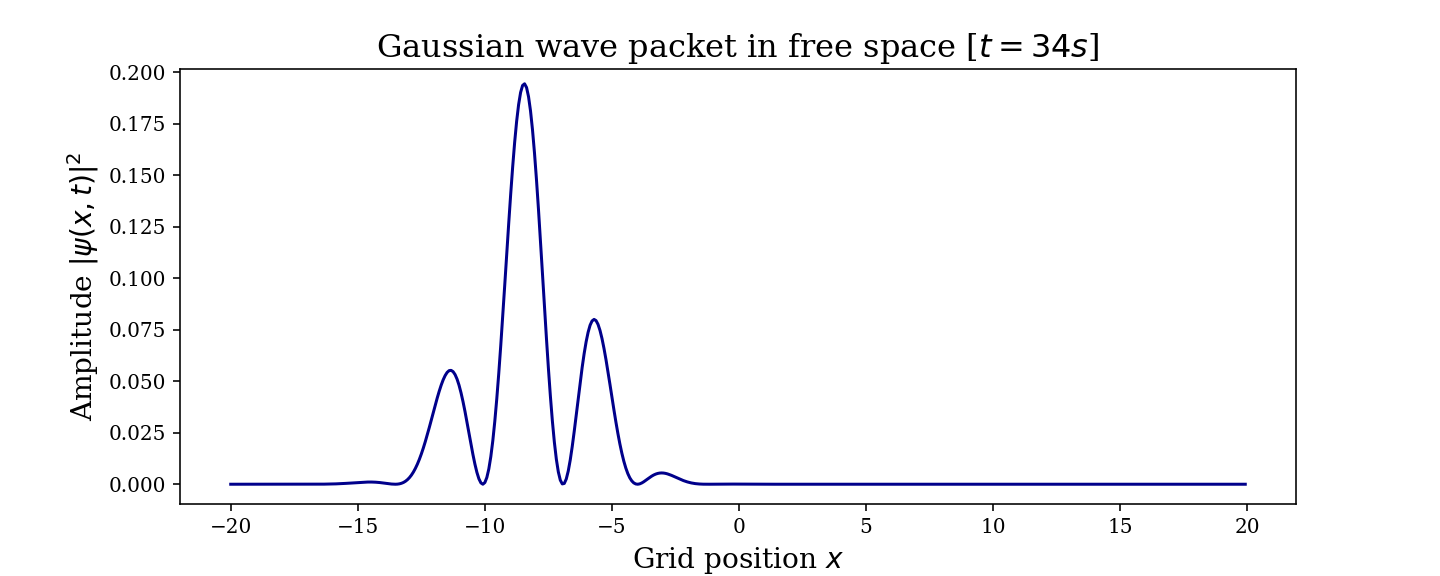

In [101]:
%matplotlib notebook
plt.rcParams["figure.figsize"][0] = 10

#axes specifications
fig, axes = plt.subplots(1,1)
axes.set_xlabel(r"Grid position $x$", size=14)
axes.set_ylabel(r"Amplitude $|\psi(x,t)|^2$", size=14)

psi0 = gaussian_wavepacket(grid2,x0,sigma,p0)
line, = (axes.plot(grid2,np.abs(my_split_step_FT(psi0,V,grid2,k_x2)[0][0])**2,color='darkblue'))

def animate(t):
    # assign current wave function to y
    axes.set_title(r"Gaussian wave packet in free space [$t={}$]".format(str(round(t,2)) + ' s'), size=16)
    line.set_data(grid2,np.abs(my_split_step_FT(psi0,V,grid2,k_x2)[0][t])**2)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,2*tsteps+2,1), # t-values and steps
                               interval=100, # wait time before displaying new frame in ms
                               blit=True)
plt.show()

<IPython.core.display.Javascript object>


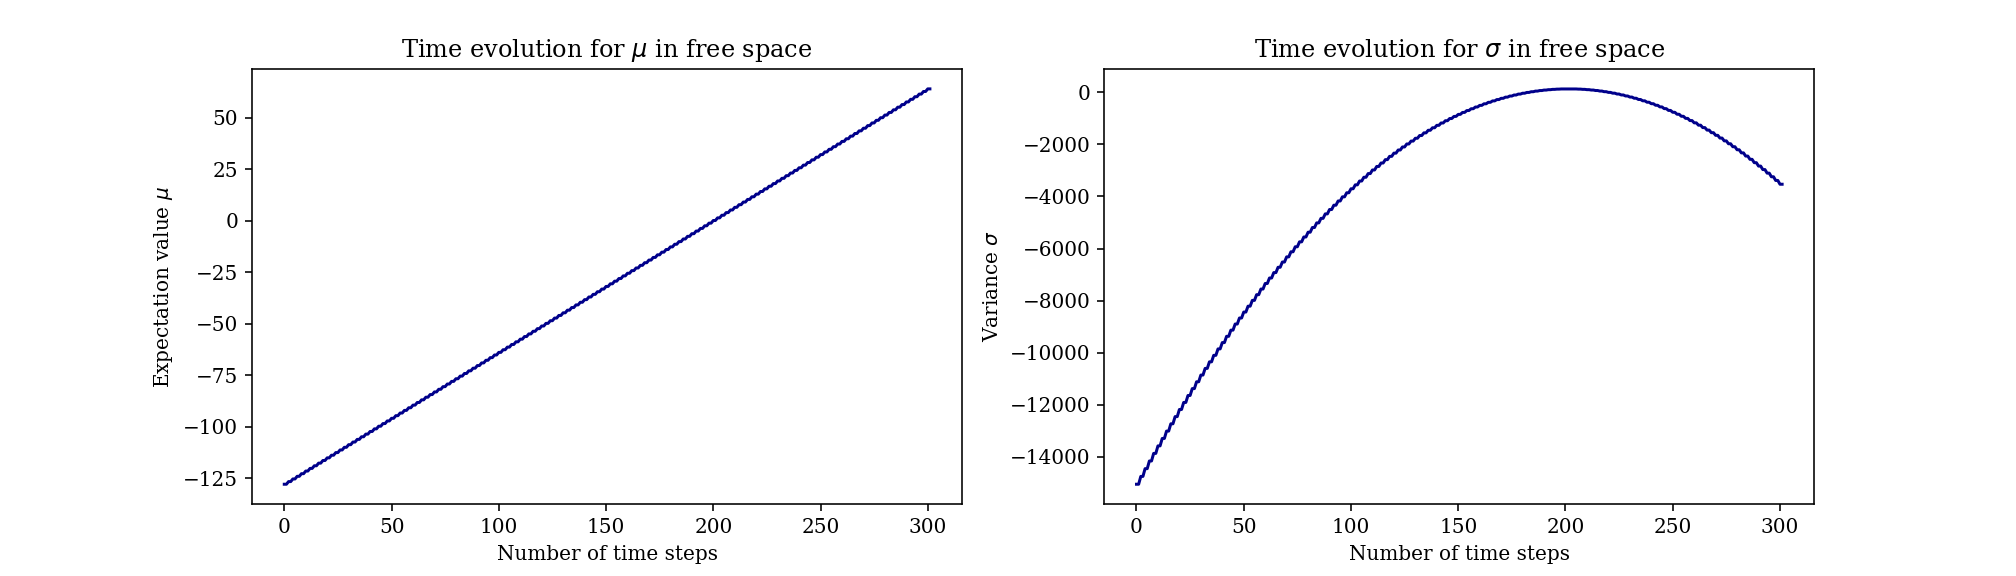

In [114]:
plt.rcParams["figure.figsize"][0] = 14

tmp =my_split_step_FT(psi0,V,grid2,k_x2)

plt.subplot(121)
plt.plot(tmp[2], color = 'darkblue')
plt.title('Time evolution for $\mu$ in free space')
plt.xlabel('Number of time steps')
plt.ylabel('Expectation value $\mu$')

plt.subplot(122)
plt.plot(tmp[3], color = 'darkblue')
plt.title('Time evolution for $\sigma$ in free space')
plt.xlabel('Number of time steps')
plt.ylabel('Variance $\sigma$')

Try out different parameters. What happens if you choose a momentum p0 which is larger than the largest momentum on you momentum space grid?

#### Interpretation:

If one chooses a momentum p0 larger than the largest momentum on the momentum space grid the wave packet seems to change the direction of evolution, due to the periodic boundary conditions, which let the wave packet appear on the other side of what one would expect.

#### Harmonic potential:
Let the wave packet from before evolve in a harmonic potential (with p0=0). Start with a wave packet that is initially at rest but displaced from the ceneter of the hanmonic potential.

Again, calculate temporal evolution of mean and variance and visualize the wave packet evolution in an animation. Is what you observe consistent with your expectation? (A Gaussian wave packet in a harmonic potential is called a coherent state. What did you learn about these in your quantum mechanics lecture?)

In [115]:
# define the grid for the new situation
L3 = 60
N3 = 512
dx3 = L3/N3
grid3 = np.linspace(-L3/2,L3/2-dx3,N3)

#parameters of the wave packet
x0 = -5;
sigma = 1;
p0 = 0;

#time steps
dt = 0.1;
tsteps = 150;

#some constants
hbar = 1 
m = 1
k0 = p0

k_x3=2*np.pi*fftshift(np.fft.fftfreq(N3,d=dx3))
dk_x3=np.diff(k_x3).mean()

<IPython.core.display.Javascript object>


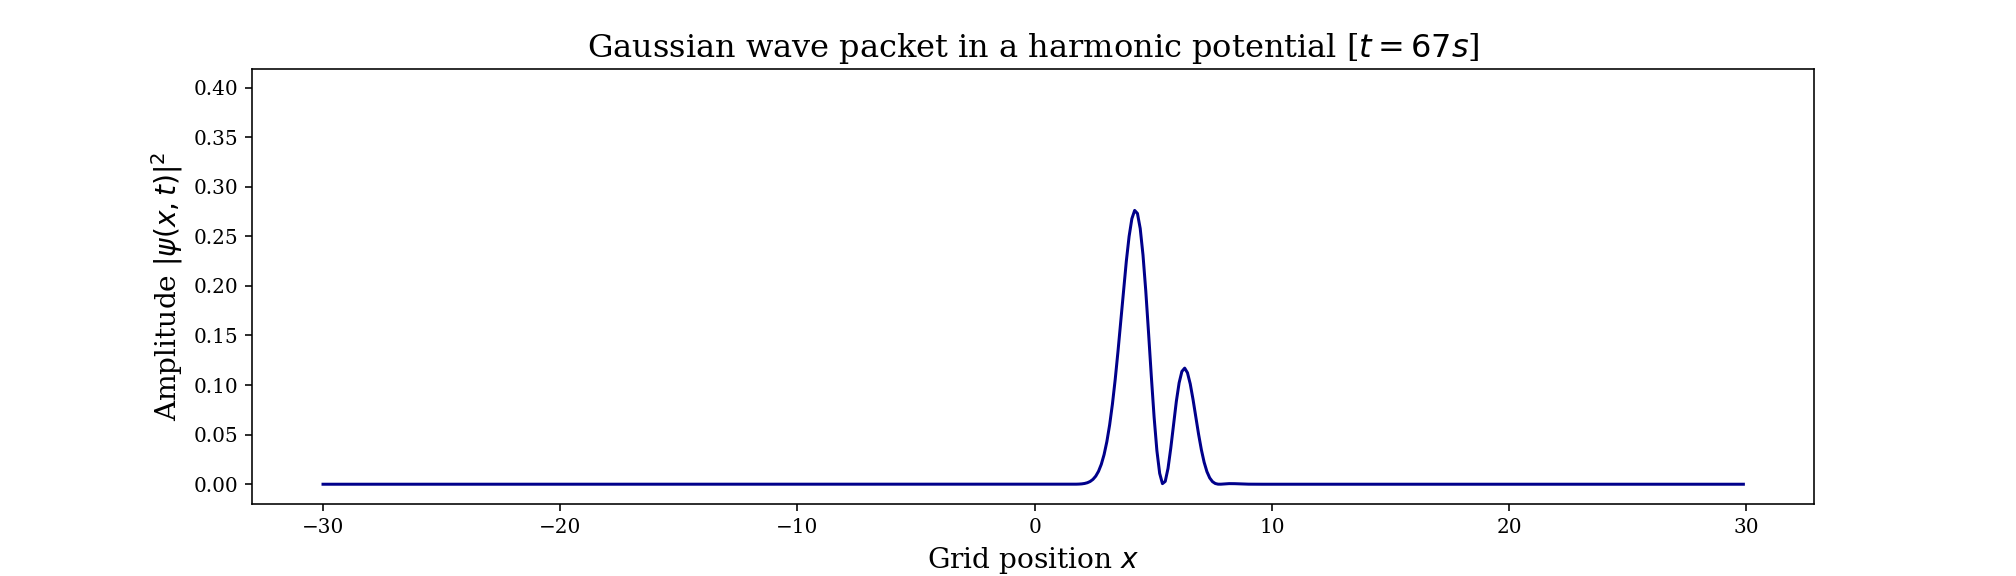

In [117]:
#Defining the oscillator potential
omega=1
def oscillator(x):
    return 1/2*m*omega**2*x**2

#axes specifications
fig, axes = plt.subplots(1,1)
axes.set_xlabel(r"Grid position $x$", size=14)
axes.set_ylabel(r"Amplitude $|\psi(x,t)|^2$", size=14)

psi0 = gaussian_wavepacket(grid3,x0,sigma,p0)
line, = (axes.plot(grid3,np.abs(my_split_step_FT(psi0,oscillator,grid3,k_x3)[0][0])**2,color='darkblue'))

def animate(t):
    # assign current wave function to y
    axes.set_title(r"Gaussian wave packet in a harmonic potential [$t={}$]".format(str(round(t,2)) + ' s'), size=16)
    line.set_data(grid3,np.abs(my_split_step_FT(psi0,oscillator,grid3,k_x3)[0][t])**2)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,2*tsteps+2,1), # t-values and steps
                               interval=100, # wait time before displaying new frame in ms
                               blit=True)
plt.show()

<IPython.core.display.Javascript object>


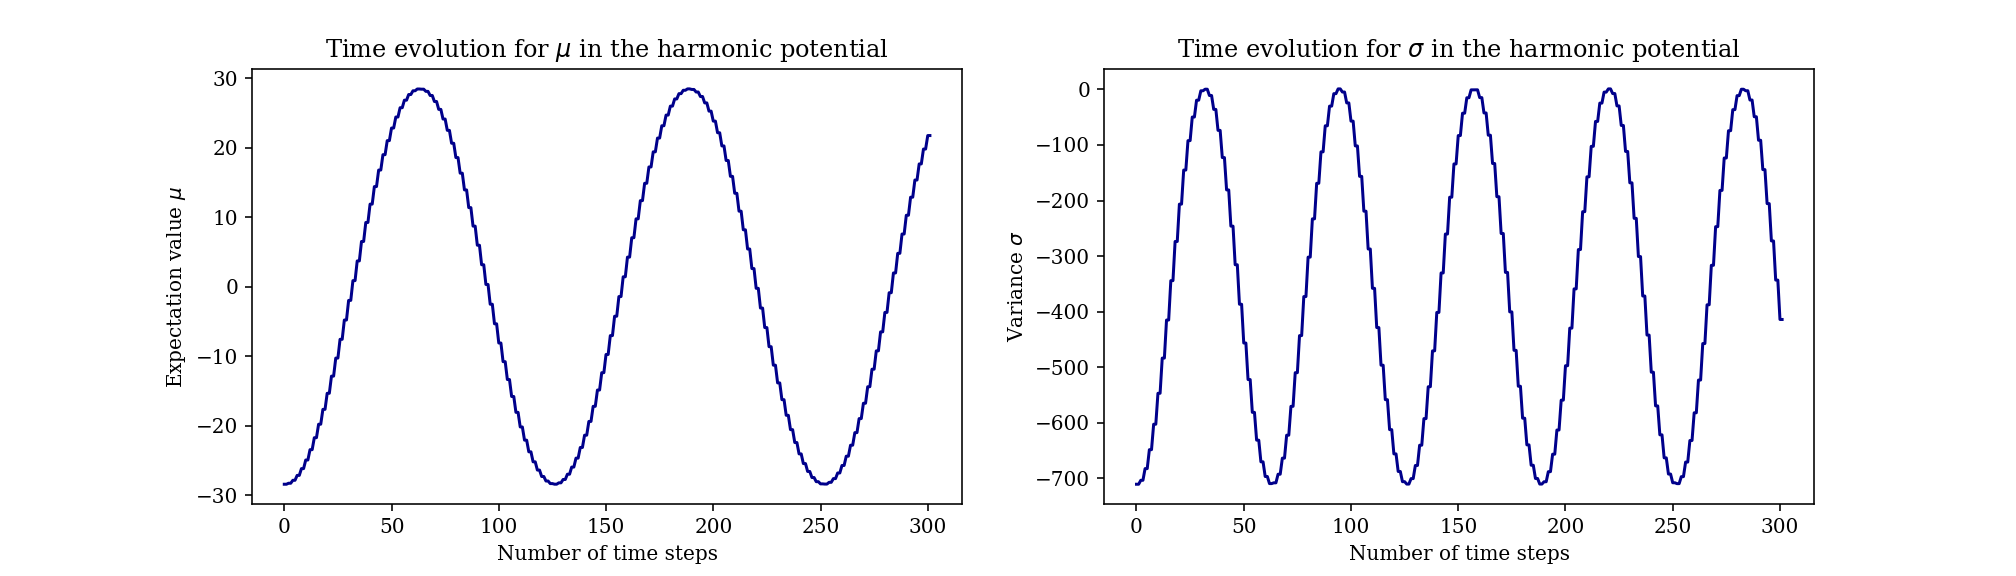

In [118]:
tmp2 = my_split_step_FT(psi0,oscillator,grid3,k_x3)

plt.subplot(121)
plt.plot(tmp2[2], color = 'darkblue')
plt.title('Time evolution for $\mu$ in the harmonic potential')
plt.xlabel('Number of time steps')
plt.ylabel('Expectation value $\mu$')

plt.subplot(122)
plt.plot(tmp2[3], color = 'darkblue')
plt.title('Time evolution for $\sigma$ in the harmonic potential')
plt.xlabel('Number of time steps')
plt.ylabel('Variance $\sigma$')

#### Interpretation:

The periodic movement of the mean value is what we expected. If our wavepacket would represent a coherent state, we would expect a time-independent constant variance. <br>
Coherent states minimize the uncertainty. They are the eigenstates of the annihilation operator $a.$

#### Potential barrier:
Now simulate the scattering off a potential step $V(x)=\theta(x)$. Choose different initial velocities. Interpret your results. What happens when the reflected wave packet reaches the boundary of the spatial grid?

Example parameters:

<IPython.core.display.Javascript object>


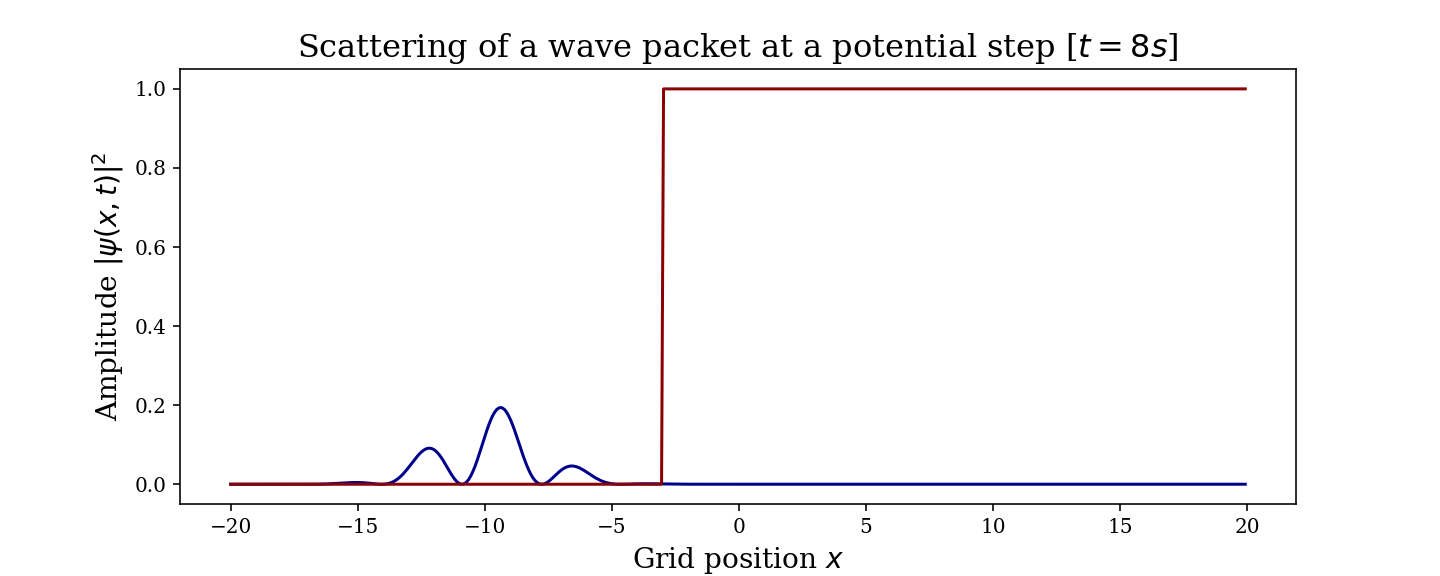

In [126]:
# define the grid for the last situation
L = 40
npoints = 512
dx4 = L/npoints
grid4 = np.linspace(-L/2,L/2-dx4,npoints)

# parameters of the wave packet
x0 = -10;
sigma = 2;
p0 = 1;# try also 1.5 and 2

#time steps
dt = 0.1;
tsteps = 250;

#potential barrier
def step(x,T,N):
    b=np.zeros(N)
    b[x>T]=1
    return b
def stepfunction(x):
    return step(x,-3,512)

%matplotlib notebook
plt.rcParams["figure.figsize"][0] = 10

#axes specifications
fig, axes = plt.subplots(1,1)
axes.set_xlabel(r"Grid position $x$", size=14)
axes.set_ylabel(r"Amplitude $|\psi(x,t)|^2$", size=14)

psi0 = gaussian_wavepacket(grid4,x0,sigma,p0)
line, = (axes.plot(grid4,np.abs(my_split_step_FT(psi0,stepfunction,grid4,k_x3)[0][0])**2,color='darkblue'))

def animate(t):
    # assign current wave function to y
    axes.set_title(r"Scattering of a wave packet at a potential step [$t={}$]".format(str(round(t,2)) + ' s'), size=16)
    line.set_data(grid4,np.abs(my_split_step_FT(psi0,stepfunction,grid4,k_x3)[0][t])**2)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,2*tsteps+2,1), # t-values and steps
                               interval=100, # wait time before displaying new frame in ms
                               blit=True)
plt.plot(grid4,stepfunction(grid4),color = 'darkred')
plt.show()

#### Interpretation:

We would expect,that parts of the wavepacket get reflected at the barrier and some part of it tunnels throught the barrier.
This is what we can see! <br>
At the boundary of the spatial grid, it's the same as hitting the potential barrier because of the periodic boundary conditions.